## Set Up Dependencies and Data


In [1]:
import joblib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/chaynes2019/AvidaGeneDupe/abfd1563f20a0fa60229e68a125d9c3f6780493f/experiments/2022-3-29-PaperDuplication/TidiedData/TaskCountTimeCourse.csv")


## Reproducibility


In [3]:
%load_ext watermark
%watermark -iwbmuvg -iv


Last updated: 2025-08-11T20:41:54.011041+00:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.32.0

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.11.0-1018-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git hash: a22e7b9329af8b25ec7d263eb1921f07ee8d4d90

Git branch: main

seaborn   : 0.13.2
joblib    : 1.3.2
pandas    : 2.2.3
numpy     : 2.2.2
teeplot   : 1.2.0
matplotlib: 3.10.0

Watermark: 2.4.3



In [4]:
joblib.hash(df)


'142c9ef657b86cd01efe882733f69fda'

# Describe data


In [5]:
df.head()


,Treatment,COPY_MUT_PROB,COPY_INS_PROB,COPY_DEL_PROB,DIVIDE_INS_PROB,DIVIDE_DEL_PROB,DIVIDE_SLIP_PROB,SLIP_FILL_MODE,Replicate #,Time,Tasks Present
0,Slip-NOP,0.0,0.0,0.0,0.0,0.0,0.05,1,1637,74700,7
1,Slip-NOP,0.0,0.0,0.0,0.0,0.0,0.05,1,1637,183300,7
2,Slip-NOP,0.0,0.0,0.0,0.0,0.0,0.05,1,1637,110000,7
3,Slip-NOP,0.0,0.0,0.0,0.0,0.0,0.05,1,1637,141700,7
4,Slip-NOP,0.0,0.0,0.0,0.0,0.0,0.05,1,1637,81400,7


In [6]:
df.describe()


,COPY_MUT_PROB,COPY_INS_PROB,COPY_DEL_PROB,DIVIDE_INS_PROB,DIVIDE_DEL_PROB,DIVIDE_SLIP_PROB,SLIP_FILL_MODE,Replicate #,Time,Tasks Present
count,420210.000000,420210.000000,420210.000000,420210.000000,420210.000000,420210.000000,420210.000000,420210.000000,420210.000000,420210.000000
mean,0.000714,0.001071,0.001071,0.014286,0.014286,0.035714,1.571429,1634.500000,100000.000000,6.939280
std,0.001129,0.002624,0.002624,0.022588,0.022588,0.022588,1.761263,60.621163,57763.955951,1.576126
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1530.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1582.000000,50000.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,1.000000,1634.500000,100000.000000,7.000000
75%,0.002500,0.000000,0.000000,0.050000,0.050000,0.050000,3.000000,1687.000000,150000.000000,8.000000
max,0.002500,0.007500,0.007500,0.050000,0.050000,0.050000,5.000000,1739.000000,200000.000000,9.000000


In [7]:
df.nunique()


Treatment              7
COPY_MUT_PROB          2
COPY_INS_PROB          2
COPY_DEL_PROB          2
DIVIDE_INS_PROB        2
DIVIDE_DEL_PROB        2
DIVIDE_SLIP_PROB       2
SLIP_FILL_MODE         5
Replicate #          210
Time                2001
Tasks Present         10
dtype: int64

In [8]:
df["Treatment"].unique()


array(['Slip-NOP', 'Baseline-Treatment', 'High-Mutation', 'Slip-random',
       'Slip-duplicate', 'Slip-scatter', 'Slip-scramble'], dtype=object)

In [9]:
df.groupby(["Treatment", "Replicate #"]).max("Time")["Time"].unique()


array([200000])

## Plot Data


In [10]:
signif = "$^*$"
env = "static"


In [11]:
def order(signif: str="") -> list:
    return [
        "Baseline",
        "High mutation rate",
        "Slip-scatter",
        "Slip-NOP",
        "Slip-random",
        f"Slip-scramble{signif}",
        f"Slip-duplicate{signif}",
    ]


teeplots/env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.pdf


teeplots/env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.png


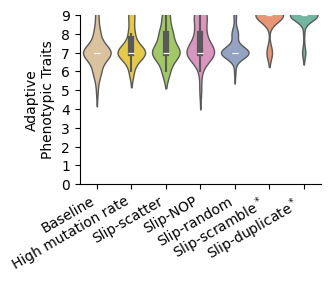

In [12]:
df_ = df.groupby(
    ["Treatment", "Replicate #"],
).max("Time").reset_index()
df_["Treatment"] = df_[
    "Treatment"
].replace(
    "Baseline-Treatment", "Baseline"
).replace(
    "High-Mutation", "High mutation rate"
).replace(
    "Slip-scramble", f"Slip-scramble{signif}"
).replace(
    "Slip-duplicate", f"Slip-duplicate{signif}",
)

with tp.teed(
    sns.catplot,
    data=df_,
    x="Treatment",
    y="Tasks Present",
    hue="Treatment",
    order=order(signif),
    hue_order=order(signif),
    aspect=1.4,
    height=2.5,
    inner="box",
    kind="violin",
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env},
) as g:
    ax, = g.axes.flat
    ax.set_ylabel("Adaptive\nPhenotypic Traits")
    ax.set_xlabel("")
    ax.set_ylim(0, 9)
    ax.set_yticks(np.arange(0, 10, 1))
    plt.xticks(rotation=30, ha="right")


teeplots/env=static+errorbar=ci+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time+y=tasks-present+ext=.pdf
teeplots/env=static+errorbar=ci+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time+y=tasks-present+ext=.png


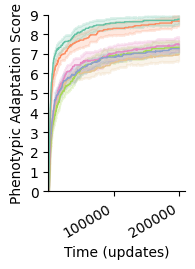

In [13]:
df_ = df.copy()
df_["Treatment"] = df_[
    "Treatment"
].replace(
    "Baseline-Treatment", "Baseline"
).replace(
    "High-Mutation", "High mutation hrate"
).replace(
    "Slip-scramble", f"Slip-scramble"
).replace(
    "Slip-duplicate", f"Slip-duplicate",
)

with tp.teed(
    sns.relplot,
    data=df_[
        df_["Time"] % 100 == 0  # speed up confidence interval bootstraps
    ],
    x="Time",
    y="Tasks Present",
    hue="Treatment",
    hue_order=order(""),
    aspect=0.9,
    errorbar="ci",
    height=2.5,
    kind="line",
    legend=False,
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env},
) as g:
    ax, = g.axes.flat
    ax.set_ylabel("Phenotypic Adaptation Score")
    ax.set_xlabel("Time (updates)")
    ax.set_ylim(0, 9)
    ax.set_xlim(0, None)
    ax.set_yticks(np.arange(0, 10, 1))
    plt.xticks(rotation=30, ha="right")
    ax.set_xticks([100_000, 200_000])


## Slice and Dice


In [14]:
df_ = df.groupby(
    ["Treatment", "Replicate #"],
).max("Time").reset_index()
df_["Treatment"] = df_[
    "Treatment"
].replace(
    "Baseline-Treatment", "Baseline"
).replace(
    "High-Mutation", "High mutation rate"
).replace(
    "Slip-scramble", f"Slip-scramble{signif}"
).replace(
    "Slip-duplicate", f"Slip-duplicate{signif}",
)


In [15]:
def order2(signif):
    return [
        "Baseline",
        f"Slip-duplicate{signif}",
        "High mutation rate",
        "Slip-scatter",
        "Slip-NOP",
        "Slip-random",
        f"Slip-scramble{signif}",
    ]


/tmp/ipykernel_4108/3258055082.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")
/home/runner/.local/lib/python3.12/site-packages/teeplot/teeplot.py:322: UserWarning: teeplot already created file teeplots/env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.pdf, overwriting it
  warnings.warn(
/home/runner/.local/lib/python3.12/site-packages/teeplot/teeplot.py:322: UserWarning: teeplot already created file teeplots/env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.png, overwriting it
  warnings.warn(


teeplots/env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.pdf
teeplots/env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.png


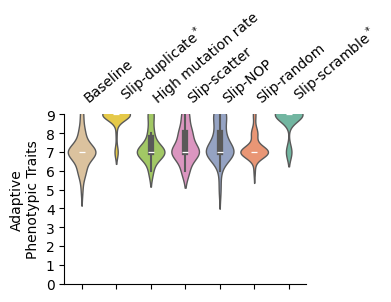

In [16]:
with tp.teed(
    sns.catplot,
    data=df_,
    x="Treatment",
    y="Tasks Present",
    hue="Treatment",
    order=order2(signif),
    hue_order=order2(signif),
    aspect=1.4,
    height=2.5,
    inner="box",
    kind="violin",
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env},
) as g:
    ax, = g.axes.flat
    # Core lines for your request:
    ax.xaxis.set_ticks_position("bottom")
    ax.xaxis.set_label_position("top")
    ax.tick_params(axis="x", labelbottom=False, labeltop=True)
    ax.set_ylabel("Adaptive\nPhenotypic Traits")
    ax.set_xlabel("")
    ax.set_yticks(np.arange(0, 10, 1))
    ax.set_ylim(0, 9)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")


teeplots/env=static+errorbar=ci+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time-100k+y=tasks-present+ext=.pdf
teeplots/env=static+errorbar=ci+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time-100k+y=tasks-present+ext=.png


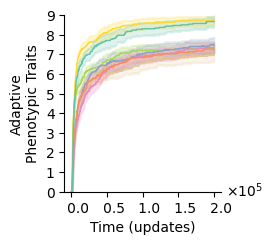

In [17]:
dfx_ = df.copy()
dfx_["Treatment"] = dfx_[
    "Treatment"
].replace(
    "Baseline-Treatment", "Baseline"
).replace(
    "High-Mutation", "High mutation rate"
).replace(
    "Slip-scramble", f"Slip-scramble"
).replace(
    "Slip-duplicate", f"Slip-duplicate",
)
dfx_["Time_100k"] = dfx_["Time"] / 100_000  # convert to 100k updates

with tp.teed(
    sns.relplot,
    data=dfx_[
        dfx_["Time"] % 100 == 0  # speed up confidence interval bootstraps
    ],
    x="Time_100k",
    y="Tasks Present",
    hue="Treatment",
    hue_order=order2(""),
    aspect=0.9,
    errorbar="ci",
    height=2.5,
    kind="line",
    legend=False,
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env},
) as g:
    ax, = g.axes.flat
    ax.set_ylabel("Adaptive\nPhenotypic Traits")
    ax.set_xlabel("Time (updates)")
    ax.set_ylim(0, 9)
    ax.set_xlim(None, None)
    ax.set_yticks(np.arange(0, 10, 1))
    ax.set_xticks([0, 0.5, 1, 1.5, 2])
    ax.set_xticklabels(
        [f"   {x.get_text()}" for x in  ax.get_xticklabels()]
    )
    ax.text(
        1.03,
        0.06,
        r"$\times10^5$",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )


teeplots/env=static+errorbar=ci+exp=alt+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time-100k+y=tasks-present+ext=.pdf
teeplots/env=static+errorbar=ci+exp=alt+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time-100k+y=tasks-present+ext=.png


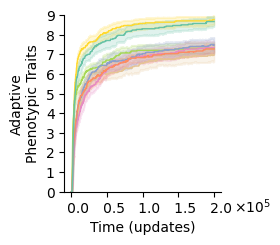

In [18]:
dfx_ = df.copy()
dfx_["Treatment"] = dfx_[
    "Treatment"
].replace(
    "Baseline-Treatment", "Baseline"
).replace(
    "High-Mutation", "High mutation rate"
).replace(
    "Slip-scramble", f"Slip-scramble"
).replace(
    "Slip-duplicate", f"Slip-duplicate",
)
dfx_["Time_100k"] = dfx_["Time"] / 100_000  # convert to 100k updates

with tp.teed(
    sns.relplot,
    data=dfx_[
        dfx_["Time"] % 100 == 0  # speed up confidence interval bootstraps
    ],
    x="Time_100k",
    y="Tasks Present",
    hue="Treatment",
    hue_order=order2(""),
    aspect=0.9,
    errorbar="ci",
    height=2.5,
    kind="line",
    legend=False,
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env, "exp": "alt"},
) as g:
    ax, = g.axes.flat
    ax.set_ylabel("Adaptive\nPhenotypic Traits")
    ax.set_xlabel("Time (updates)")
    ax.set_ylim(0, 9)
    ax.set_xlim(None, None)
    ax.set_yticks(np.arange(0, 10, 1))
    ax.set_xticks([0, 0.5, 1, 1.5, 2])
    ax.set_xticklabels(
        [f"   {x.get_text()}" for x in  ax.get_xticklabels()]
    )
    ax.text(
        1.08,
        -0.03,
        r"$\times10^5$",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )


teeplots/env=static+errorbar=ci+exp=below+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time-100k+y=tasks-present+ext=.pdf
teeplots/env=static+errorbar=ci+exp=below+hue=treatment+kind=line+palette=set2-r+viz=relplot+x=time-100k+y=tasks-present+ext=.png


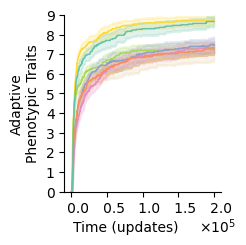

In [19]:
dfx_ = df.copy()
dfx_["Treatment"] = dfx_[
    "Treatment"
].replace(
    "Baseline-Treatment", "Baseline"
).replace(
    "High-Mutation", "High mutation rate"
).replace(
    "Slip-scramble", f"Slip-scramble"
).replace(
    "Slip-duplicate", f"Slip-duplicate",
)
dfx_["Time_100k"] = dfx_["Time"] / 100_000  # convert to 100k updates

with tp.teed(
    sns.relplot,
    data=dfx_[
        dfx_["Time"] % 100 == 0  # speed up confidence interval bootstraps
    ],
    x="Time_100k",
    y="Tasks Present",
    hue="Treatment",
    hue_order=order2(""),
    aspect=0.9,
    errorbar="ci",
    height=2.5,
    kind="line",
    legend=False,
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env, "exp": "below"},
) as g:
    ax, = g.axes.flat
    ax.set_ylabel("Adaptive\nPhenotypic Traits")
    ax.set_xlabel("Time (updates)        ")
    ax.set_ylim(0, 9)
    ax.set_xlim(None, None)
    ax.set_yticks(np.arange(0, 10, 1))
    ax.set_xticks([0, 0.5, 1, 1.5, 2])
    ax.set_xticklabels(
        [f"   {x.get_text()}" for x in  ax.get_xticklabels()]
    )
    ax.text(
        0.86,
        -0.14,
        r"$\times10^5$",
        transform=ax.transAxes,
        ha="left",
        va="top",
    )


/tmp/ipykernel_4108/4169636742.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")
/tmp/ipykernel_4108/4169636742.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")


teeplots/col=split+env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.pdf
teeplots/col=split+env=static+hue=treatment+inner=box+kind=violin+palette=set2-r+viz=catplot+x=treatment+y=tasks-present+ext=.png


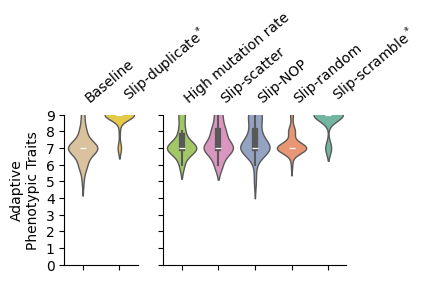

In [20]:
df_["split"] = df_["Treatment"].map(
    {
        "Baseline": 0,
        "High mutation rate": 1,
        f"Slip-duplicate{signif}": 0,
        f"Slip-scramble{signif}": 1,
        "Slip-NOP": 1,
        "Slip-random": 1,
        "Slip-scatter": 1,
    },
)

with tp.teed(
    sns.catplot,
    data=df_,
    x="Treatment",
    y="Tasks Present",
    hue="Treatment",
    col="split",
    order=order2(signif),
    hue_order=order2(signif),
    aspect=0.8,
    height=2.5,
    inner="box",
    kind="violin",
    sharex=False,
    linewidth=1,
    palette="Set2_r",
    teeplot_outattrs={"env": env},
) as g:
    g.set(ylabel="Adaptive\nPhenotypic Traits")
    g.set_titles("")
    for ax in g.axes.flat:
        ax.xaxis.set_ticks_position("bottom")
        ax.xaxis.set_label_position("top")
        ax.tick_params(axis="x", labelbottom=False, labeltop=True)
        ax.set_xlabel("")
        ax.set_yticks(np.arange(0, 10, 1))
        ax.set_ylim(0, 9)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")


    g.sharex = False
    g.axes.flat[0].set_xlim(None, 1.5)
    g.axes.flat[1].set_xlim(1.5, None)

    gs = g.axes[0, 0].get_gridspec()
    gs.set_width_ratios([2, 5])  # [left, right]

    g.fig.subplots_adjust(wspace=0.2)
